Implementing Dijkstra's shortest path (from a given source vertex) problem

In [0]:
#imports
from collections import defaultdict
from typing import List, Dict
import pprint
#this imports "infinity"
from math import inf


**Input notation of a weighted undirected graph** <br><br>

n = number of vertices <br>
V = vertex_set = {0,1,2,...,n-1} <br>
edge_list = [[start_vertex, end_vertex, weight_of_edge_1], [start_vertex, end_vertex, weight_of_edge_2], .... ] <br>

In [0]:
def convert_to_adjacency_dict(n: int, edge_list: List[List[int]]) -> Dict[int, List[int]]:
 """
 converts the edge_list into an adjacency_dict where 
 adjacency_dict[vertex v] = [List of tuples (x, w) where x is connected to v and edge v-x has weight w]
 """
 adjacency_dict = defaultdict(list)
 for start, end, weight in edge_list:
      adjacency_dict[start].append((end, weight))
      adjacency_dict[end].append((start, weight))
 return adjacency_dict

In [76]:
help(convert_to_adjacency_dict)

Help on function convert_to_adjacency_dict in module __main__:

convert_to_adjacency_dict(n:int, edge_list:List[List[int]]) -> Dict[int, List[int]]
    converts the edge_list into an adjacency_dict where 
    adjacency_dict[vertex v] = [List of tuples (x, w) where x is connected to v and edge v-x has weight w]



**Test example of a graph G** <br><br>
my_n = 5 <br>
my_edge_list = [[0,1,2],[0,4,8],[1,2,3],[1,4,2],[2,3,1],[3,4,1]]



In [0]:
#test_input
my_n = 5
my_edge_list = [[0,1,2],[0,4,8],[1,2,3],[1,4,2],[2,3,1],[3,4,1]]


In [0]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_graph(n: int, edge_list = List[List[int]]):

  #define vertexlabels
    my_vertexlabels = {}
    vertices = []
    for i in range(n):
      my_vertexlabels[i] = i
      vertices.append(i)



    # define set of nodes  = {0,1,2,.., n-1}
    nodes = set(vertices)

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges and create edge labels dictionary
    my_edgelabels = {}
    for edge in edge_list:
        G.add_edge(edge[0], edge[1])
        my_edgelabels[(edge[0], edge[1])] = edge[2]
  

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos, edge_color='black', node_color='gray', node_size=500)
    nx.draw_networkx_labels(G, pos, my_vertexlabels, font_size=20)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=my_edgelabels,font_color='black', font_size = 25)

    # show graph
    plt.show()



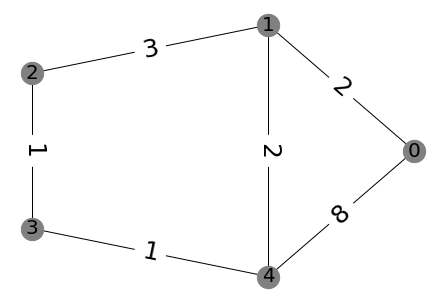

In [79]:
# draw example
draw_graph(my_n, my_edge_list)


In [80]:
convert_to_adjacency_dict(my_n, my_edge_list)

defaultdict(list,
            {0: [(1, 2), (4, 8)],
             1: [(0, 2), (2, 3), (4, 2)],
             2: [(1, 3), (3, 1)],
             3: [(2, 1), (4, 1)],
             4: [(0, 8), (1, 2), (3, 1)]})

**Implementing Dijkstra**

In [0]:
def dijkstra(n: int, edge_list: List[List[int]], startvertex: int)-> List[int]:
    """
    Given n, edge_list, and a startvertex, runs dijkstra and 
    returns a shortestpaths list of size n where shortestpath[i] = shortest distance between i and startvertex
    """
    adjacency_dict = convert_to_adjacency_dict(n, edge_list)
    shortestpaths = [inf]*n
    burnt = {}
    to_be_burnt = {startvertex: 0}
    while to_be_burnt:
         nextvertex, pathlength = min(to_be_burnt.items(), key=lambda x: x[1])
         burnt[nextvertex] = pathlength
         del to_be_burnt[nextvertex]
         #update to_be_burnt
         for neighbour, weight in adjacency_dict[nextvertex]:
             newlength = pathlength + weight
             if neighbour in to_be_burnt:
                to_be_burnt[neighbour] = min(to_be_burnt[neighbour], newlength)
             elif neighbour not in burnt:
                to_be_burnt[neighbour] = newlength
    for vertex in range(n):
          if vertex in burnt:
            shortestpaths[vertex] = burnt[vertex]
                            
    return shortestpaths
        

**Running dijkstra on our example**<br><br>
my_n = 5 <br>
my_edge_list = [[0,1,2],[0,4,8],[1,2,3],[1,4,2],[2,3,1],[3,4,1]] <br>
my_start_vertex = 0



In [0]:
#test input
my_n = 5
my_edge_list = [[0,1,2],[0,4,8],[1,2,3],[1,4,2],[2,3,1],[3,4,1]] 
my_start_vertex = 0


In [0]:
#draw test graph with start vertex labelled with pink
def draw_graph_with_startvertex(n: int, edge_list: List[List[int]], start_vertex : int):

  #define vertexlabels
    my_vertexlabels = {}
    vertices = []
    for i in range(n):
      my_vertexlabels[i] = i
      vertices.append(i)



    # define set of nodes  = {0,1,2,.., n-1}
    nodes = set(vertices)

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges and create edge labels dictionary
    my_edgelabels = {}
    for edge in edge_list:
        G.add_edge(edge[0], edge[1])
        my_edgelabels[(edge[0], edge[1])] = edge[2]
  

    # draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos, edge_color='black', node_color='gray', node_size=500)
    nx.draw_networkx_labels(G, pos, my_vertexlabels, font_size=20)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=my_edgelabels,font_color='black', font_size = 25)
    nx.draw_networkx_nodes(G,pos, nodelist=[start_vertex], node_color='r', node_size=500)

    # show graph
    plt.show()

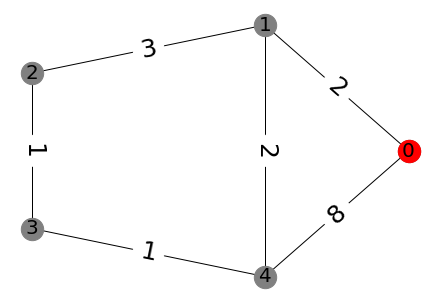

In [84]:
draw_graph_with_startvertex(my_n, my_edge_list, my_start_vertex)


In [85]:
dijkstra(my_n, my_edge_list, my_start_vertex)

[0, 2, 5, 5, 4]